# Project: Investigate a Dataset - [European Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This football database comes from Kaggle and it contains data for football matches, players, and teams from several European countries from 2008 to 2016.
It has:
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
There are seven tables containing all this information - Country, Legaue, Match, Player, Player Attributes, Team, Team Attributes.


### Question(s) for Analysis
1. Is there a benefit to being the home team?
2. Which league has been the most exciting?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling & Cleaning

All seven tables are imported using pandas.

In [3]:
def table(arg):
    c = pd.read_csv(arg)
    return c

c_c = table('Country.csv')
c_l = table('League.csv')
c_ma = table('Match.csv')
c_p = table('Player.csv')
c_a = table('Player_Attributes.csv')
c_ta = table('Team_Attributes.csv')
T = pd.read_csv('Team.csv', encoding='latin-1') # fixing the UnicodeDecodeError

In [4]:
c_c.info()
c_c.head()
c_c.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


id       int64
name    object
dtype: object

In [5]:
c_l.info()
c_l.head(10)
c_l.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


id             int64
country_id     int64
name          object
dtype: object

The Match table below has 115 column and needs to be trimmed down for analysis

In [6]:
c_ma.info()
pd.set_option('display.max_columns', None) # In order to view all columns
c_ma.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


After previewing the Match table, a lot of the columns were odds for betting companies as well as the goal statistic for all 22 players on the field of play for every game. all these columns were dropped as the information was too ambiguous.

In [7]:
# Dropping columns that contain data irrelevant to the analysis
c_ma.drop(c_ma.iloc[:,11:], inplace=True, axis=1)

In [8]:
c_ma.head()
c_ma.dtypes

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

In [9]:
# Changing the date column to datetime
c_ma["date"] = pd.to_datetime(c_ma["date"])

In [10]:
# check if change is effected
c_ma.dtypes

id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
dtype: object

In [11]:
c_p.info()
c_p.head(20)
c_p.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [12]:
# Changing the birthday column to datetime
c_p["birthday"] = pd.to_datetime(c_p["birthday"])

In [13]:
c_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [14]:
# Changing date column to a datetime datatype
c_a["date"] = pd.to_datetime(c_a["date"])

In [15]:
c_ta["date"] = pd.to_datetime(c_ta["date"])

In [16]:
c_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreatio

In [17]:
# Dropping the buildUpPlayDribbling column as it's data is limited
c_ta.drop(c_ta.iloc[:,6:7], axis=1, inplace=True)

In [18]:
c_ta.info()
c_ta.head()
c_ta.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreatio

id                                         int64
team_fifa_api_id                           int64
team_api_id                                int64
date                              datetime64[ns]
buildUpPlaySpeed                           int64
buildUpPlaySpeedClass                     object
buildUpPlayDribblingClass                 object
buildUpPlayPassing                         int64
buildUpPlayPassingClass                   object
buildUpPlayPositioningClass               object
chanceCreationPassing                      int64
chanceCreationPassingClass                object
chanceCreationCrossing                     int64
chanceCreationCrossingClass               object
chanceCreationShooting                     int64
chanceCreationShootingClass               object
chanceCreationPositioningClass            object
defencePressure                            int64
defencePressureClass                      object
defenceAggression                          int64
defenceAggressionCla

Each research question is targeted at players and teams present in the top 5 leagues as recognized by UEFA (the governing body). They include; the english league, spanish league, italian league, german league and france league. The data will therefore be trimmed to accomodate only the top 5 leagues.

In [19]:
c_l.head(20)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [20]:
c_c.head

<bound method NDFrame.head of        id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland>

In [21]:
c_ma.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [22]:
# creating tables for each league
eng =  c_ma.query('country_id >= 1729 & country_id < 4769')
frc =  c_ma.query('country_id >= 4769 & country_id < 7809')
ger =  c_ma.query('country_id >= 7809 & country_id < 10257')
ita =  c_ma.query('country_id >= 10257 & country_id < 13274')
spa =  c_ma.query('country_id >= 21518 & country_id < 24558')
# converting the tables into dataframes
eng = pd.DataFrame(eng)
frc = pd.DataFrame(frc)
ger = pd.DataFrame(ger)
ita = pd.DataFrame(ita)
spa = pd.DataFrame(spa)

In [23]:
# Adding a column to each dataframe that specifies the Country
name = np.repeat('England',3040)
eng['Country'] = name

name2 = np.repeat('France',3040)
frc['Country'] = name2

name3 = np.repeat('Germany',2448)
ger['Country'] = name3

name4 = np.repeat('Italy',3017)
ita['Country'] = name4

name5 = np.repeat('Spain',3040)
spa['Country'] = name5

In [24]:
# Merging the data containing the top 5 leagues
df = pd.concat([eng, frc, ger, ita, spa], ignore_index=True)

In [25]:
df.head()
df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,14585.000000,14585.000000,14585.000000,14585.000000,1.458500e+04,14585.000000,14585.000000,14585.000000,14585.000000
mean,10739.324306,9271.884882,9271.884882,19.152143,1.198544e+06,9513.471718,9513.674734,1.539184,1.140075
std,6984.373837,6921.447469,6921.447469,10.810203,4.941698e+05,8097.777199,8097.767842,1.289485,1.129409
min,1729.000000,1729.000000,1729.000000,1.000000,4.831290e+05,4087.000000,4087.000000,0.000000,0.000000
25%,5375.000000,4769.000000,4769.000000,10.000000,7.056020e+05,8535.000000,8535.000000,1.000000,0.000000
50%,9021.000000,7809.000000,7809.000000,19.000000,1.216821e+06,8686.000000,8686.000000,1.000000,1.000000
75%,12667.000000,10257.000000,10257.000000,28.000000,1.709701e+06,9869.000000,9869.000000,2.000000,2.000000
max,24557.000000,21518.000000,21518.000000,38.000000,2.118418e+06,208931.000000,208931.000000,10.000000,9.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1. Is there a benefit to being the home team?

In [26]:
df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,14585.000000,14585.000000,14585.000000,14585.000000,1.458500e+04,14585.000000,14585.000000,14585.000000,14585.000000
mean,10739.324306,9271.884882,9271.884882,19.152143,1.198544e+06,9513.471718,9513.674734,1.539184,1.140075
std,6984.373837,6921.447469,6921.447469,10.810203,4.941698e+05,8097.777199,8097.767842,1.289485,1.129409
min,1729.000000,1729.000000,1729.000000,1.000000,4.831290e+05,4087.000000,4087.000000,0.000000,0.000000
25%,5375.000000,4769.000000,4769.000000,10.000000,7.056020e+05,8535.000000,8535.000000,1.000000,0.000000
50%,9021.000000,7809.000000,7809.000000,19.000000,1.216821e+06,8686.000000,8686.000000,1.000000,1.000000
75%,12667.000000,10257.000000,10257.000000,28.000000,1.709701e+06,9869.000000,9869.000000,2.000000,2.000000
max,24557.000000,21518.000000,21518.000000,38.000000,2.118418e+06,208931.000000,208931.000000,10.000000,9.000000


A quick description tells us that on the average the home team scores more goals than the away team, at a rate of 1.5 to 1.1

In [27]:
# Extracting data showing all home wins
hw = df.query('home_team_goal > away_team_goal')
hw.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,6748.000000,6748.000000,6748.000000,6748.000000,6.748000e+03,6748.000000,6748.000000,6748.000000,6748.000000
mean,10922.310462,9471.661678,9471.661678,19.284529,1.188362e+06,9358.373444,9591.985181,2.422051,0.537937
std,7083.175679,7023.282430,7023.282430,10.796607,4.920319e+05,6252.107357,8883.937017,1.183354,0.693967
min,1730.000000,1729.000000,1729.000000,1.000000,4.831290e+05,4087.000000,4087.000000,1.000000,0.000000
25%,5431.500000,4769.000000,4769.000000,10.000000,7.052378e+05,8543.000000,8530.000000,2.000000,0.000000
50%,9198.500000,7809.000000,7809.000000,19.000000,1.083260e+06,8689.000000,8686.000000,2.000000,0.000000
75%,12838.250000,10257.000000,10257.000000,29.000000,1.536786e+06,9873.000000,9873.000000,3.000000,1.000000
max,24557.000000,21518.000000,21518.000000,38.000000,2.060645e+06,208931.000000,208931.000000,10.000000,4.000000


In [28]:
# Ectracting data showing all away wins
aw = df.query('away_team_goal > home_team_goal')
aw.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,4098.000000,4098.000000,4098.000000,4098.00000,4.098000e+03,4098.000000,4098.000000,4098.000000,4098.000000
mean,10743.679112,9245.991459,9245.991459,19.13592,1.218321e+06,9733.750854,9315.570766,0.594680,2.276720
std,6974.683545,6916.576329,6916.576329,10.92774,4.962675e+05,10254.470298,5683.536235,0.709392,1.088942
min,1731.000000,1729.000000,1729.000000,1.00000,4.831320e+05,4087.000000,4087.000000,0.000000,1.000000
25%,5328.500000,4769.000000,4769.000000,10.00000,8.301475e+05,8528.000000,8543.000000,0.000000,1.000000
50%,8998.500000,7809.000000,7809.000000,19.00000,1.217150e+06,8668.000000,8686.000000,0.000000,2.000000
75%,12662.500000,10257.000000,10257.000000,29.00000,1.709859e+06,9869.000000,9864.000000,1.000000,3.000000
max,24552.000000,21518.000000,21518.000000,38.00000,2.118418e+06,208931.000000,208931.000000,4.000000,9.000000


In [29]:
# Extracting data showing stalemates
draw = df.query('away_team_goal == home_team_goal')
draw.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,3739.000000,3739.000000,3739.000000,3739.000000,3.739000e+03,3739.000000,3739.000000,3739.000000,3739.000000
mean,10404.305162,8939.715164,8939.715164,18.930998,1.195246e+06,9551.957743,9589.468040,0.981011,0.981011
std,6802.526424,6727.527186,6727.527186,10.703832,4.952130e+05,8362.688723,8827.141261,0.843515,0.843515
min,1729.000000,1729.000000,1729.000000,1.000000,4.831350e+05,4087.000000,4087.000000,0.000000,0.000000
25%,5341.500000,4769.000000,4769.000000,10.000000,7.056065e+05,8534.000000,8535.000000,0.000000,0.000000
50%,8744.000000,7809.000000,7809.000000,19.000000,1.083304e+06,8689.000000,8689.000000,1.000000,1.000000
75%,12453.000000,10257.000000,10257.000000,28.000000,1.709752e+06,9869.000000,9869.000000,1.000000,1.000000
max,24556.000000,21518.000000,21518.000000,38.000000,2.060637e+06,208931.000000,208931.000000,5.000000,5.000000


Out of 14585 matches played between 2008 - 2016 within the top 5 european leagues, 6748 matches resulted in a home win(46%), 4098 matches resulted in an away win(28%) and 3739 matches(26%) were deadlocked at full time. **Therefore there is a 72% chance that the home teams earns a point in every game.**

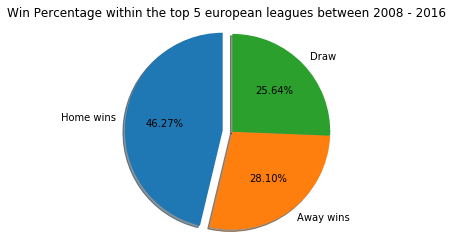

In [30]:
home = hw['id'].value_counts().sum()
away = aw['id'].value_counts().sum()
dw = draw['id'].value_counts().sum()

labels = 'Home wins', 'Away wins', 'Draw'
sizes = [home,away,dw]
explode = (0.1,0,0) # Making the home wins pop out
fig,ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Win Percentage within the top 5 european leagues between 2008 - 2016');

**Here we see a quite significant margin between home wins and away wins, with home wins nearly accounting for half the games played over the time period.

In [31]:
hg = df['home_team_goal'].sum()

In [32]:
ag =  df['away_team_goal'].sum()

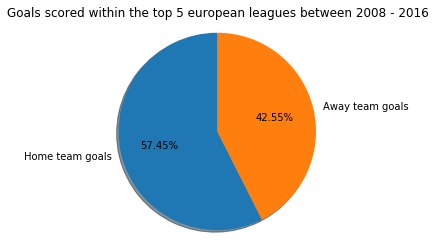

In [33]:
labels = 'Home team goals', 'Away team goals'
sizes = [hg,ag]
explode = (0,0)
fig,ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Goals scored within the top 5 european leagues between 2008 - 2016');

**The home teams definitely put on a show, outscoring the away teams nearly 60% of the time within the top 5 leagues.

### Which league has been the most exciting?

In [34]:
df.groupby('Country').mean()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
Country,,,,,,,,,
England,3248.5,1729.0,1729.0,19.500000,1.178767e+06,9142.275000,9142.275000,1.550987,1.159539
France,6288.5,4769.0,4769.0,19.500000,1.171642e+06,9808.300000,9808.300000,1.402961,1.040132
Germany,9032.5,7809.0,7809.0,17.500000,1.189377e+06,9180.250000,9180.250000,1.626634,1.274918
Italy,11765.0,10257.0,10257.0,19.441167,1.236752e+06,10345.651641,10346.633079,1.500829,1.116009
Spain,23037.5,21518.0,21518.0,19.500000,1.214688e+06,9032.287500,9032.287500,1.631250,1.135855


At first glance, the german league seems to score the most goals on average however, there are other metrics to be considered...

In [35]:
goals = df.iloc[:,9:12]
goals = pd.DataFrame(goals)

In [36]:
goals.groupby('Country').sum()

,home_team_goal,away_team_goal
Country,,
England,4715,3525
France,4265,3162
Germany,3982,3121
Italy,4528,3367
Spain,4959,3453


The spanish fans appear to have seen more goals at their home stadiums than any other league

In [37]:
# Creating a column to distinguish wins from draws
goals.loc[goals['home_team_goal'] < goals['away_team_goal'], 'Win'] = 1 
goals.loc[goals['home_team_goal'] > goals['away_team_goal'], 'Win'] = 1
goals.loc[goals['home_team_goal'] == goals['away_team_goal'], 'Win'] = 0

In [38]:
Wins = goals.query('Win == 1')

In [39]:
a = Wins.groupby('Country').sum()
a.head()

,home_team_goal,away_team_goal,Win
Country,,,
England,3921,2731,2257.0
France,3498,2395,2181.0
Germany,3339,2478,1851.0
Italy,3731,2570,2221.0
Spain,4292,2786,2336.0


The spanish league takes the cake here with more goals at home, away and total wins in general, with the english league coming in as a close second

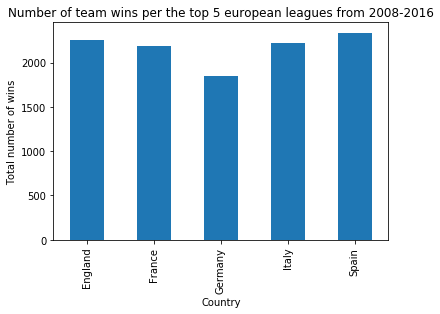

In [40]:
a.Win.plot(kind = 'bar')
plt.title('Number of team wins per the top 5 european leagues from 2008-2016')
plt.ylabel('Total number of wins');

**According to the chart above, the Spanish league has recorded the most amount of wins within the top 5 leagues

In [41]:
goals['total_goals'] = goals['home_team_goal'] + goals['away_team_goal']
goals.head()

,home_team_goal,away_team_goal,Country,Win,total_goals
0,1,1,England,0.0,2
1,1,0,England,1.0,1
2,0,1,England,1.0,1
3,2,1,England,1.0,3
4,4,2,England,1.0,6


In [42]:
b = goals.groupby('Country').sum()
b

,home_team_goal,away_team_goal,Win,total_goals
Country,,,,
England,4715,3525,2257.0,8240
France,4265,3162,2181.0,7427
Germany,3982,3121,1851.0,7103
Italy,4528,3367,2221.0,7895
Spain,4959,3453,2336.0,8412


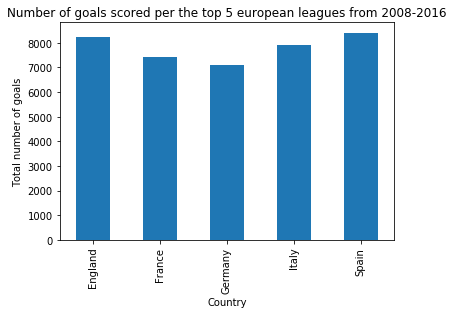

In [43]:
b.total_goals.plot(kind = 'bar')
plt.title('Number of goals scored per the top 5 european leagues from 2008-2016')
plt.ylabel('Total number of goals');

**The Spanish and English league scored over 8000 goals within the time period, with the spanish league edging out slightly with the most goals scored.

<a id='conclusions'></a>
## Conclusions

## 1. Is there a benefit to being the home team?

- Yes there is a benefit as the data has shown there is a clear advantage to being the home team as a whooping 72% of the time, the home team walks away with a point. Also the home team scores more goals on average.

Limitation - The data does not provide us with additional information as to why the home team has such a huge advantage. There are other metrics to consider like fan attendance, fatigue from travel, stadium capacity etc

## 2. Which league has been the most exciting?

- The spanish league has proven to be the most exciting league as it recorded the most goals scored both home and away as well as, the most wins over the stated time period. In football, goals are the endgame and they get fans off their feet so therefore it would be fair to deduce that spanish fans have had more to cheer on than the other top 5 leagues in european football.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255